# Fair Bayesian Network Implementation

In this notebook, a fair bayesian network implementation is performed.

## Imports

In [ ]:
import pandas as pd
import sys
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, balanced_accuracy_score, roc_curve
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.5f' % x)
label_encoder = LabelEncoder()

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

from forseti.datproc import translate_categorical
from forseti.bayesnet import latentLabelClassifier

## Clean Data and Train Bayesian Network

In [ ]:
df = pd.read_csv('data/adult.csv')
sensitives = ['gender', 'race']
label = 'income'

train = df[:30000]
test = df[30000:]

clf = latentLabelClassifier(
    train,
    sensitives,
    label,
    atol=0.01,
    classes=2
)

clf.load('trained-models/fair_model_30000.sav')

## Predict on new data

In [ ]:
tmp, _ = translate_categorical(test);
y = tmp['income'];
tmp = tmp.drop('income', axis=1);

In [ ]:
y_pred = clf.predict_probability(tmp)

# Replace NA with prior prediction
naindexes = y_pred.isna().any(axis=1)
y_pred[naindexes] = 0
y_pred.to_csv('results/y_pred_probability.csv')

## Save Predictions to File

In [79]:
y_pred_label_fair = (y_pred['fair_0'] >= 0.5).astype('int')
y_pred_label_fair.to_csv('results/y_pred_label_fair.csv')

y_pred_label_fair = (y_pred['income_1'] >= 0.5).astype('int')
y_pred_label_fair.to_csv('results/y_pred_label_income.csv')

## Plot ROC curve 

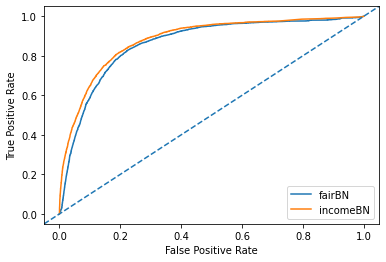

In [80]:
fpr_fair, tpr_fair, _ = roc_curve(y,  y_pred['fair_0'])
fpr_income, tpr_income, _ = roc_curve(y,  y_pred['income_1'])

#create ROC curve
plt.plot(fpr_fair, tpr_fair, label='fairBN')
plt.plot(fpr_income, tpr_income, label='incomeBN')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.axline((1, 1), slope=1, ls="--")
plt.legend()
plt.show()